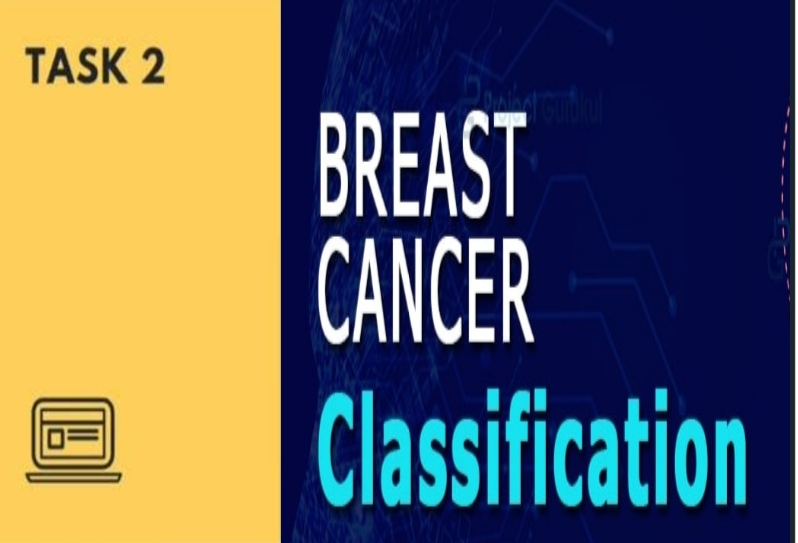

## Importing Libraries

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [20]:
import warnings
warnings.filterwarnings('ignore')

## Dataset Details

**Attribute Information**:

- 1) ID number
- 2) Diagnosis (M = malignant, B = benign)

**Ten real-valued features are computed for each cell nucleus**:

- radius (mean of distances from center to points on the perimeter)
- texture (standard deviation of gray-scale values)
- perimeter
- area mean
- smoothness mean (local variation in radius lengths)
- compactness (perimeter^2 / area - 1.0)
- concavity (severity of concave portions of the contour)
- concave points (number of concave portions of the contour)
- symmetry
- fractal dimension ("coastline approximation" - 1)

- The mean, standard error and "worst" or largest (mean of the threelargest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

- All feature values are recoded with four significant digits.

- Missing attribute values: none

- Class distribution: 357 benign, 212 malignant

## Importing the dataset/ Loading the data

In [10]:
df = pd.read_csv('breast_cancer_data.csv')

In [12]:
import pandas as pd
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)

# Add the target column to the DataFrame
df['target'] = data.target
df.to_csv('breast_cancer_dataset.csv', index=False)

In [13]:
df.head(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,0
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,0
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,0
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,0
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,0


In [14]:
df.shape

(569, 31)

## Data Visualization & Analysis

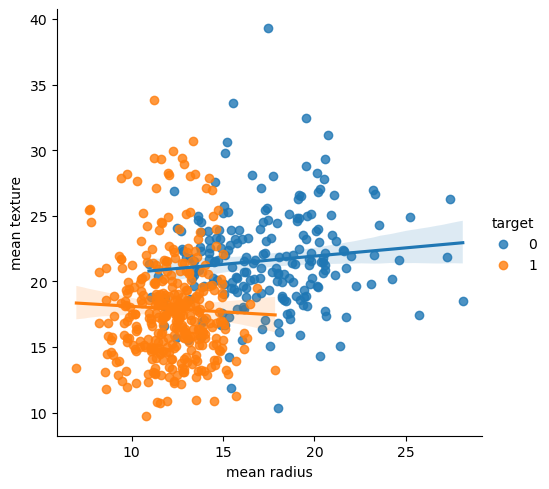

In [17]:
sns.lmplot(x="mean radius", y="mean texture", hue="target",data=df)

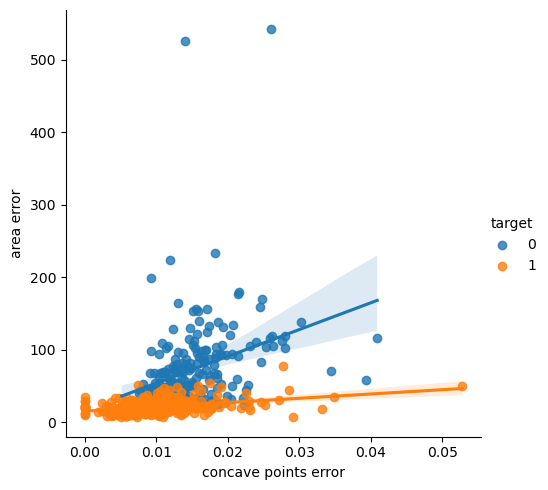

In [22]:
## two features with very different scales
sns.lmplot(x="concave points error", y="area error", hue="target", data=df)

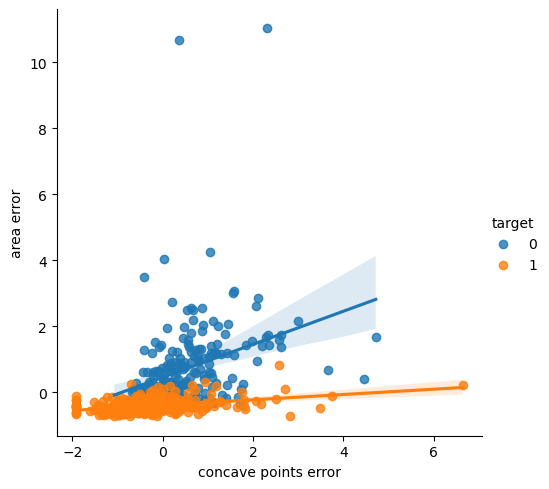

In [23]:
## Standardization of data and plot again
df["target"] = df['target'].astype('category')
df_copy = df.copy(deep=True)
pdt = df_copy.loc[:, df_copy.columns != 'target']
standardized_df = (pdt-pdt.mean()) / pdt.std()
standardized_df['target'] = df_copy['target']
sns.lmplot(x="concave points error", y="area error", hue="target", data=standardized_df)

- (Note that 0 is malignant, and 1 is benign.)
- From the above plot of the standardized features, we can see that both features are now centered around 0 with a standard deviation of 1. The datapoint distributions and patterns remain the same.

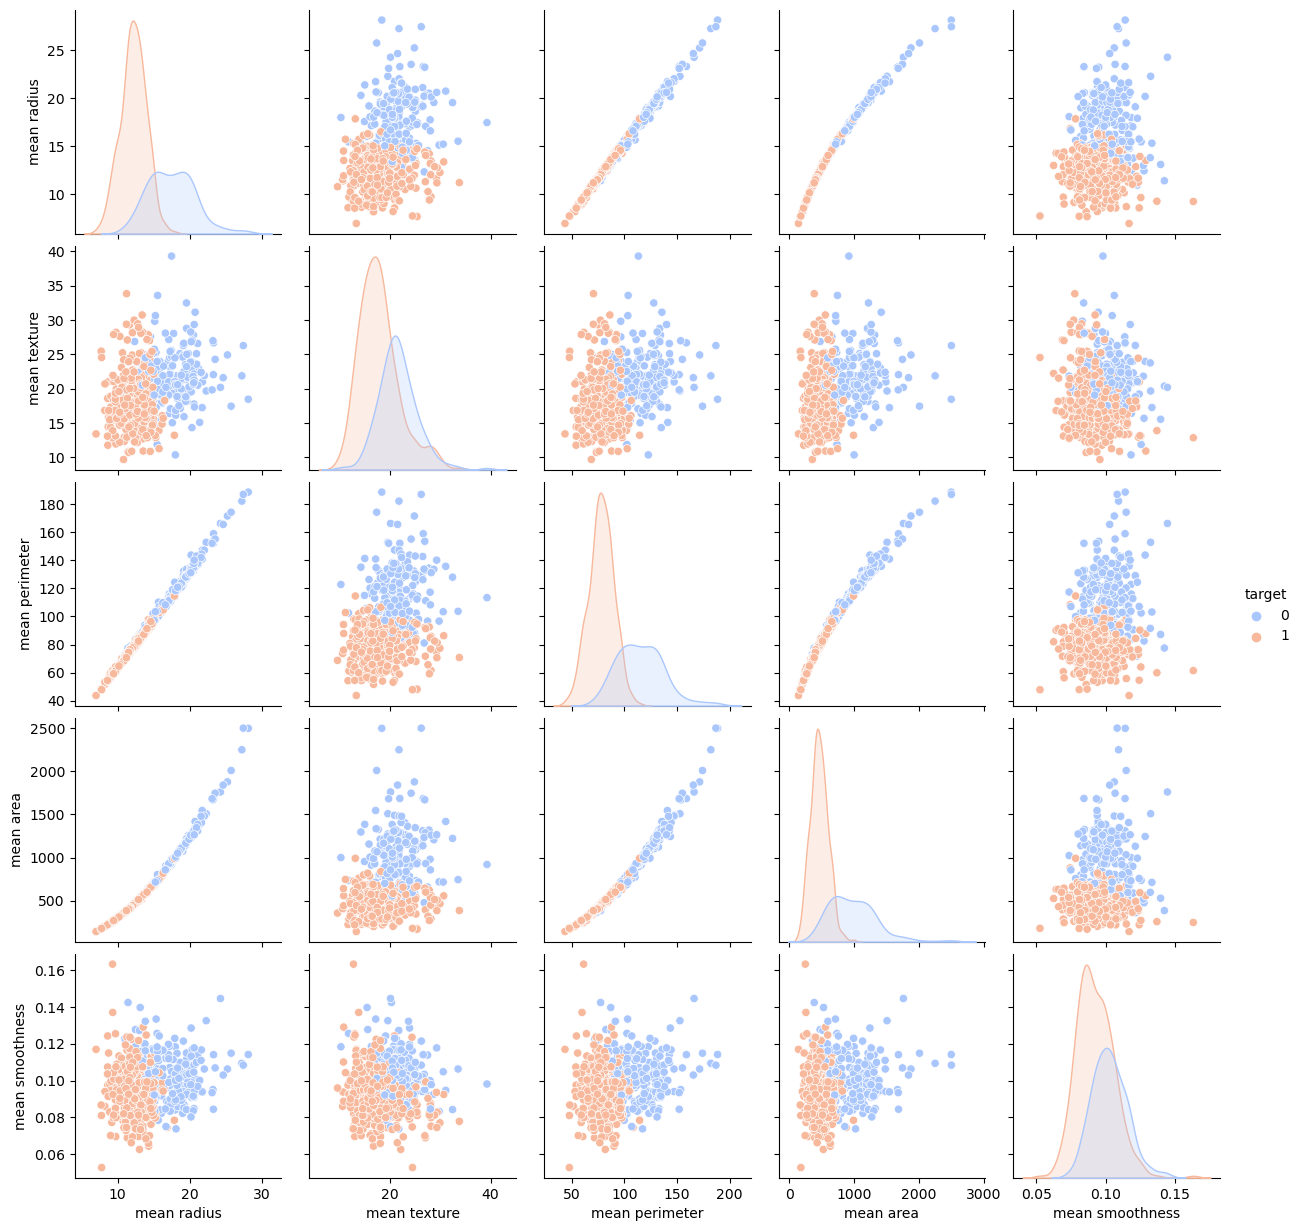

In [20]:
sns.pairplot(df,hue = 'target', palette= 'coolwarm', 
             vars = ['mean radius', 'mean texture', 'mean perimeter','mean area','mean smoothness'])

In [6]:
# count the number of empty values in each columns:
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [7]:
# drop the columns with all the missing values:
df = df.dropna(axis = 1)

In [8]:

# Get the count of the number of Malignant(M) or Benign(B) cells
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

- visualization of  the diagnosis column in the dataset to see how many malignant and benign are present.

In [11]:
# Check unique values in the 'diagnosis' column
print(df['diagnosis'].unique())

['M' 'B']


<Axes: ylabel='count'>

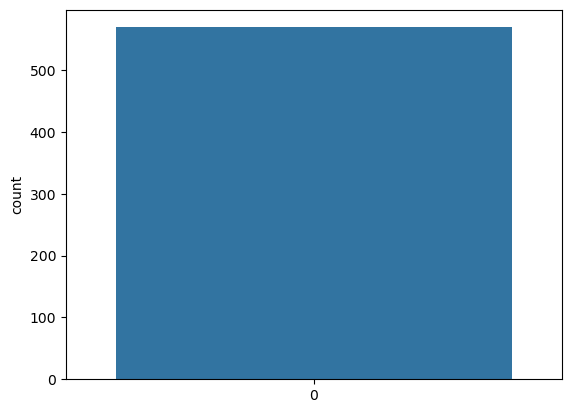

In [14]:
# Encode 'diagnosis' column as numeric
df['diagnosis'] = df['diagnosis'].map({'M': 0, 'B': 1})

# Visualize the count
sns.countplot(df['diagnosis'], label='count')

## Data Pre-Processing

In [15]:
df.dtypes

id                           int64
diagnosis                  float64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [16]:
# Rename the diagnosis data to labels:
df = df.rename(columns = {'diagnosis' : 'label'})
print(df.dtypes)

id                           int64
label                      float64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [21]:
# define the dependent variable that need to predict(label)
y = df['label'].values
print(np.unique(y))

[nan]


## Encoding Categorical Data

In [22]:

labelencoder = LabelEncoder()
Y = labelencoder.fit_transform(y) # M = 1 and B = 0
print(np.unique(Y))

[0]


In [23]:
# define the independent variables, Drop label and ID, and normalize other data:
X  = df.drop(labels=['label','id'],axis = 1)

In [24]:
#scale / normalize the values to bring them into similar range:
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)
print(X)

[[0.52103744 0.0226581  0.54598853 ... 0.91202749 0.59846245 0.41886396]
 [0.64314449 0.27257355 0.61578329 ... 0.63917526 0.23358959 0.22287813]
 [0.60149557 0.3902604  0.59574321 ... 0.83505155 0.40370589 0.21343303]
 ...
 [0.45525108 0.62123774 0.44578813 ... 0.48728522 0.12872068 0.1519087 ]
 [0.64456434 0.66351031 0.66553797 ... 0.91065292 0.49714173 0.45231536]
 [0.03686876 0.50152181 0.02853984 ... 0.         0.25744136 0.10068215]]


## Testing & Training

In [25]:
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## Kth Nearest Neighbour(KNN) Classifier

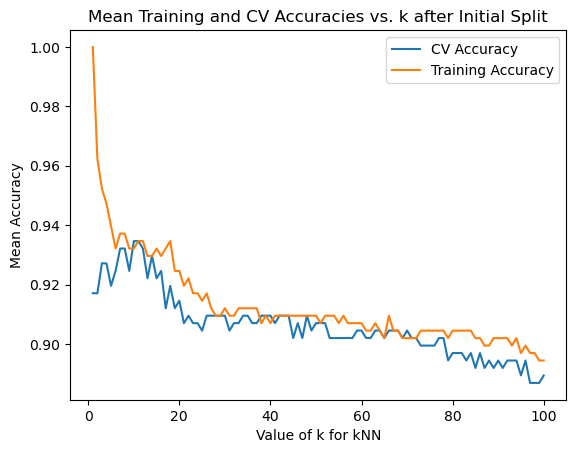

In [33]:
## Create helper function for plotting the training accuracy vs. 
## cross-validation accuracy plot with various k values
def k_acc_plot(start: int, end: int, X_t, y_t, method: str):
    ## Set k range and initialize lists
    k_range = range(start, end)
    k_scores = []
    train_acc = []
    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_t, y_t)
        accuracy = accuracy_score(y_t, knn.predict(X_t))
        scores = cross_val_score(knn, X_t, y_t, cv=5, scoring='accuracy')
        k_scores.append(scores.mean())
        train_acc.append(accuracy.mean())
        
     ## Plot mean CV accuracies for k
    plt.title('Mean Training and CV Accuracies vs. k after ' + method)
    plt.plot(k_range, k_scores, label="CV Accuracy")
    plt.plot(k_range, train_acc, label="Training Accuracy")
    plt.legend()
    plt.xlabel('Value of k for kNN')
    plt.ylabel('Mean Accuracy')
    plt.show()

## Plot accuracies vs. k values
k_acc_plot(1, 101, X_train, y_train, "Initial Split")

## Using GridSearchCV validation

In [35]:
## Find best k using GridSearchCV

## Create a helper function for using GridSearchCV to check results
def gridsearch_check(start: int, end: int, X_t, y_t):
    knn = KNeighborsClassifier()
    param_grid = {'n_neighbors': np.arange(start, end)}
    knn_gscv = GridSearchCV(knn, param_grid, cv=5)
    knn_gscv.fit(X_t, y_t)
    print('Best k: ', knn_gscv.best_params_, ', Best score: ', knn_gscv.best_score_ * 100, "%")

## Run GridSearchCV to check results
gridsearch_check(1, 101, X_train, y_train)

Best k:  {'n_neighbors': 10} , Best score:  93.46518987341771 %


- From the mean CV accuracy plot and the GridSearchCV validation of the original dataset, the best k is 10 with a best CV accuracy score of 93.47%.

## Correlation scores between each pair of features

In [36]:
corr = X.corr()
corr.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316


<Axes: >

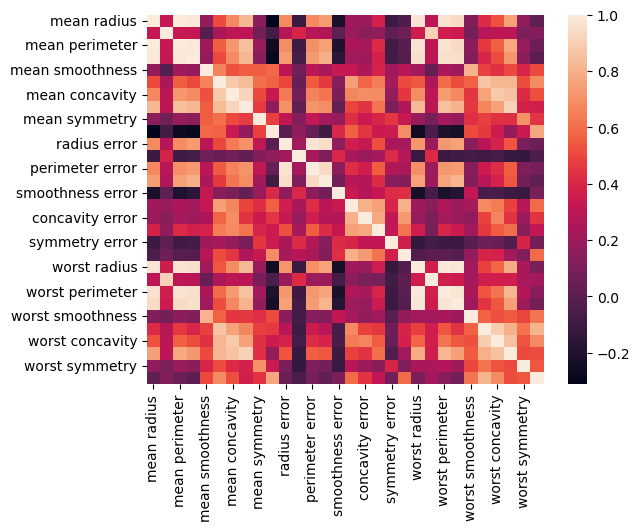

In [37]:
sns.heatmap(corr)

In [38]:
#Removing Highly-Correlated Features
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False

## Set up remaining data
X_corr = X.copy(deep=True)
selected_columns = X_corr.columns[columns]
X_corr = X_corr[selected_columns]
X_corr.shape

(569, 20)

## KNN Classifier with Standardization

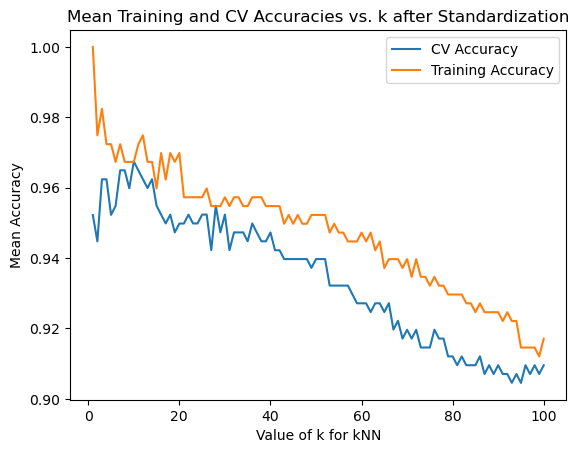

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

sc = StandardScaler()
X_train3 = sc.fit_transform(X_train)
X_train3_df = pd.DataFrame(X_train3, index=X_train.index, columns=X_train.columns)
X_test3 = sc.transform(X_test)

## Plot accuracies vs. k values
k_acc_plot(1, 101, X_train3_df, y_train, "Standardization")

In [41]:
gridsearch_check(1, 101, X_train3_df, y_train)

Best k:  {'n_neighbors': 10} , Best score:  96.74367088607593 %


- We can infer that with standardization, the CV accuracy has increased to 96.74%.